In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Step 1: Load and Inspect the Dataset

In [8]:
df=pd.read_excel('Election_Data.xlsx')

In [9]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [10]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [11]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


 Step 2: Check for Missing Values and Data Types

In [12]:
print(df.isnull().sum())

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64


In [13]:
print(df.dtypes)

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object


In [28]:
# Convert categorical variables to numerical
df["vote"] = df["vote"].map({"Labour": 0, "Conservative": 1})
df["gender"] = df["gender"].map({"female": 0, "male": 1})

Step 3: Exploratory Data Analysis (EDA)

📌 Statistical Summary

In [14]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


📌 Visualizing Target Variable Distribution

📌 Univariate Analysis

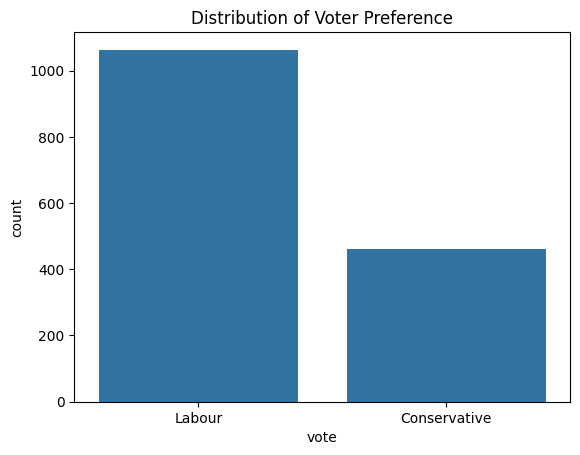

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for 'vote' column
sns.countplot(x=df["vote"])
plt.title("Distribution of Voter Preference")
plt.show()


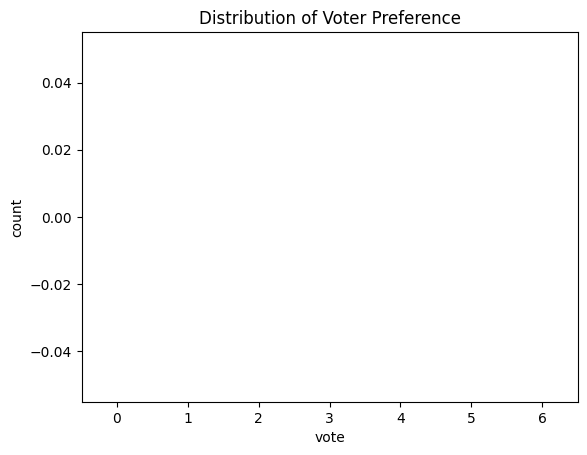

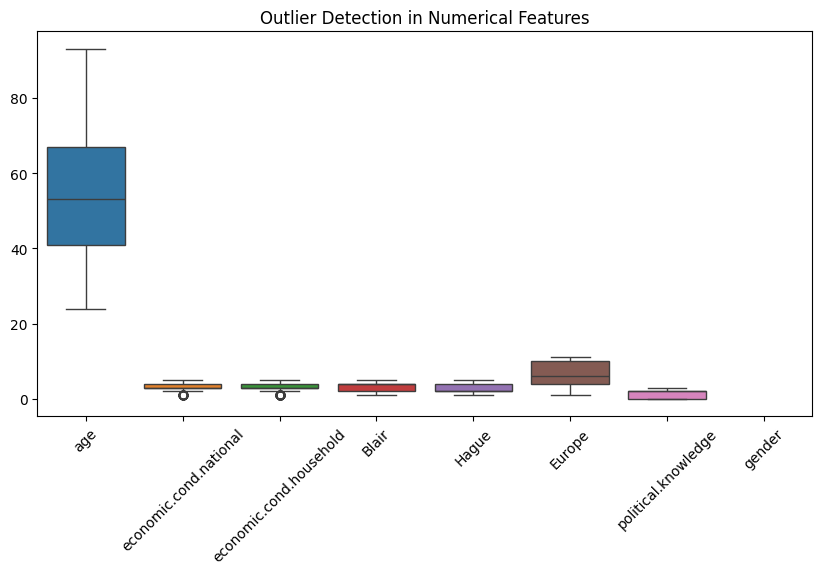

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of target variable
sns.countplot(x=df["vote"])
plt.title("Distribution of Voter Preference")
plt.show()

# Boxplot to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df.drop(columns=["vote"]))
plt.title("Outlier Detection in Numerical Features")
plt.xticks(rotation=45)
plt.show()


📌 Checking Correlations Between Features

📌 Bivariate Analysis

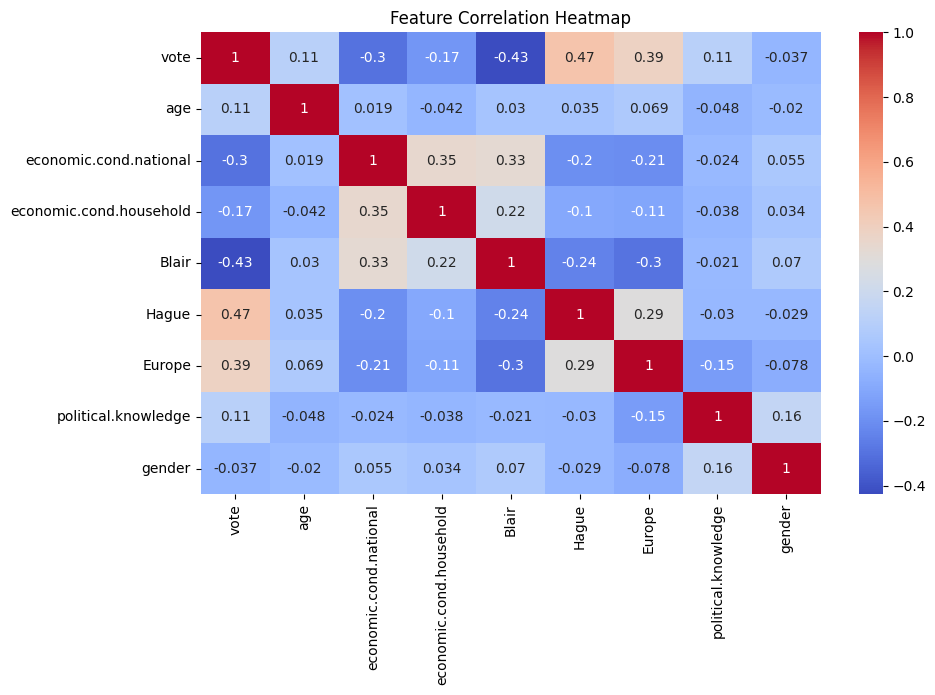

In [18]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


 Step 4: Convert Categorical Variables

In [17]:
# Convert categorical variables to numerical
df["vote"] = df["vote"].map({"Labour": 0, "Conservative": 1})
df["gender"] = df["gender"].map({"female": 0, "male": 1})

# Check the dataset after transformation
df.head()


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,0,43,3,3,4,1,2,2,0
1,0,36,4,4,4,4,5,2,1
2,0,35,4,4,5,2,3,2,1
3,0,24,4,2,2,1,4,0,0
4,0,41,2,2,1,1,6,2,1


Step 5: Split the Data into Training and Testing Sets

In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop(columns=["vote"])  # Independent variables
y = df["vote"]  # Dependent variable (target)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the sets
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (1220, 8)
Testing Data Shape: (305, 8)


Step 6: Train Classification Models

 Train a Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       216
           1       0.70      0.57      0.63        89

    accuracy                           0.80       305
   macro avg       0.77      0.74      0.75       305
weighted avg       0.80      0.80      0.80       305



c:\Users\rk871\OneDrive\Desktop\Data-Code\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Train a Random Forest Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8032786885245902
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       216
           1       0.69      0.60      0.64        89

    accuracy                           0.80       305
   macro avg       0.77      0.74      0.75       305
weighted avg       0.80      0.80      0.80       305



Train an XGBoost Model

In [23]:
from xgboost import XGBClassifier

# Initialize and train the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


c:\Users\rk871\OneDrive\Desktop\Data-Code\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:34:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7901639344262295
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       216
           1       0.64      0.63      0.64        89

    accuracy                           0.79       305
   macro avg       0.75      0.74      0.74       305
weighted avg       0.79      0.79      0.79       305



Step 7: Compare Models and Select the Best One

In [24]:
# Store model accuracies
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
}

# Print model comparison
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")


Logistic Regression: 0.8033
Random Forest: 0.8033
XGBoost: 0.7902


 Step 8: Interpret Insights & Write a Business Report

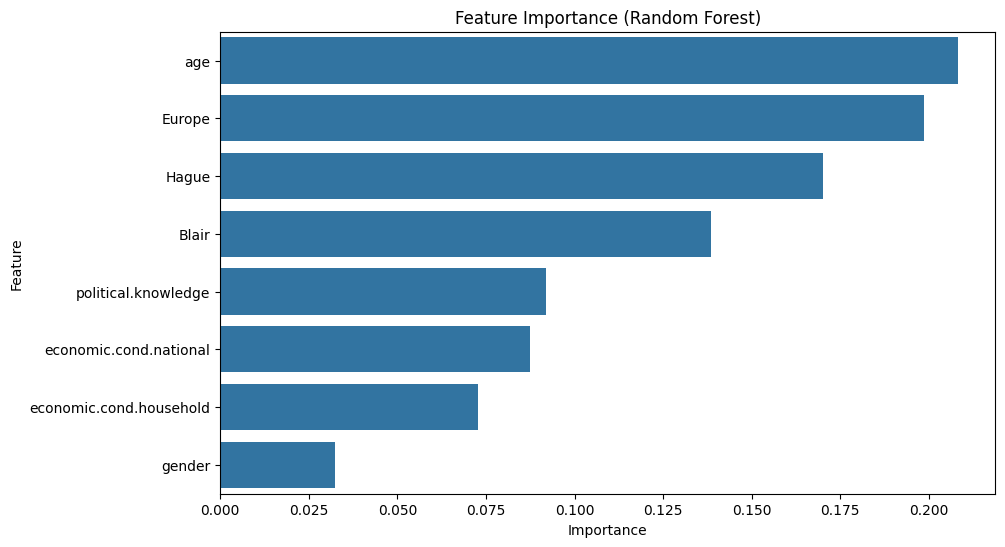

In [25]:
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance['Importance'], y=feature_importance['Feature'])
plt.title("Feature Importance (Random Forest)")
plt.show()


 Step 9: Save and Export the Best Model

In [27]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf, "voting_prediction_model.pkl")

# Load the saved model
loaded_model = joblib.load("voting_prediction_model.pkl")

# Make new predictions
new_predictions = loaded_model.predict(X_test)

# Print the predictions
print(new_predictions)


[0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0
 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0
 0 0 1 0 0 0 0 0 0]
